# **Import Data**

In [92]:
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
License(s): DbCL-1.0
red-wine-quality-cortez-et-al-2009.zip: Skipping, found more recently modified local copy (use --force to force download)


In [93]:
#import zipfile module
from zipfile import ZipFile

with ZipFile('red-wine-quality-cortez-et-al-2009.zip', 'r') as f:
    #extract in current directory
    f.extractall()

# **Libraries**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from feature_engine.outliers import Winsorizer

# **Data Loading**

In [95]:
x = pd.read_csv('winequality-red.csv')

In [96]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [97]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**insight :**
1. ada 12 fitur dengan masing masing type data number
2. tidak ada missing value

In [98]:
x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**insight:**
1. dilihat dari jarak antara mean dan median dan jarak antar quartil, beberapa fitur memiliki distribusi normal
2. untuk fitur 'free sulfur dioxide' an 'total sulfur dioxide' ada kemungkinan memiliki distribusi skew
2. untuk fitur selain 'density' dan 'pH' memungkinkan memiliki outlier

In [99]:
x.duplicated().sum()

240

**insight:** terdapat data duplicate

# **Prepocessing**

## **EDA**

1. bagaimana distribusi data di tiap fitur?
2. apakah terdapat outlier?
3. apakah datanya balance?


### **1. Bagaimana Distribusi data tiap fitur?**

In [100]:
fitur_number = x.select_dtypes(include=['int', 'float']).columns # Mengambil fitur fitur yang bertipe data integer dan float

highly_skewed = []
moderately_skewed = []
normal_skewed = []

# Perulangan untuk mengecek skewnes masing masing fitur 
for i in x[fitur_number].columns : 
    nilai_skew = x[i].skew() # Hitung skewness
    if nilai_skew < -1 or nilai_skew > 1 : # Jika skewnessnya lebih besar dari 1 atau lebih kecil -1
        highly_skewed.append(i)
    elif (nilai_skew >= -1 and nilai_skew <= -0.5) or (nilai_skew <= 1 and nilai_skew >= 0.5) :  # Jika skewnessnya di antara -1 dan -0.5 atau di antara 1 dan 0.5
        moderately_skewed.append(i)
    else : # Jika skewnessnya tidak memenuhi dua kondisi di atas
        normal_skewed.append(i)

In [101]:
for i in highly_skewed :
    print(i, end=", ")

residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, 

In [102]:
for i in moderately_skewed :
    print(i, end=", ")

fixed acidity, volatile acidity, alcohol, 

In [103]:
for i in normal_skewed :
    print(i, end=", ")

citric acid, density, pH, quality, 

**insight:** sesuai yang udah di temukan di data loading bahwa terdapat fitur dengan distribusi normal dan skew

### **Apakah ada outlier?**

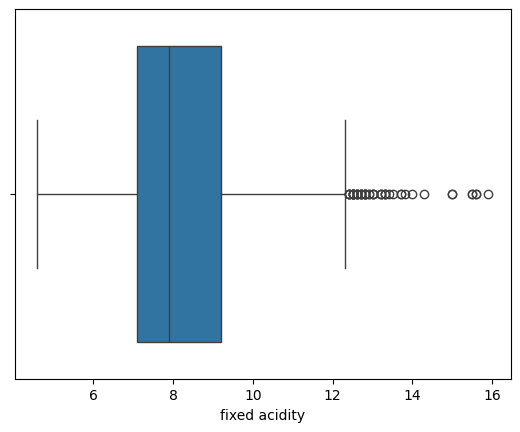

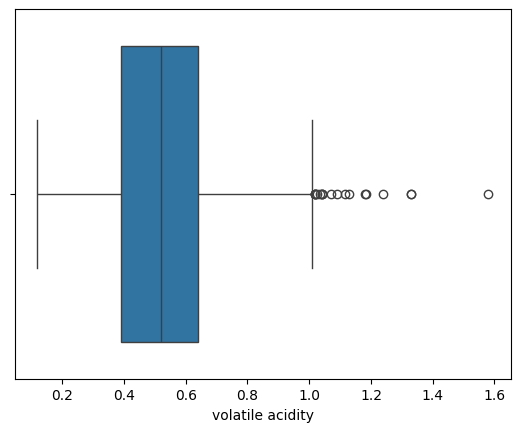

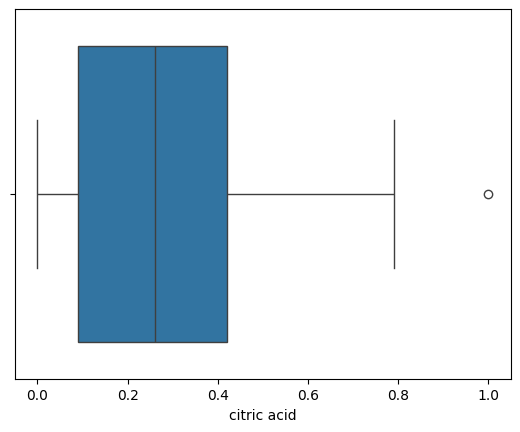

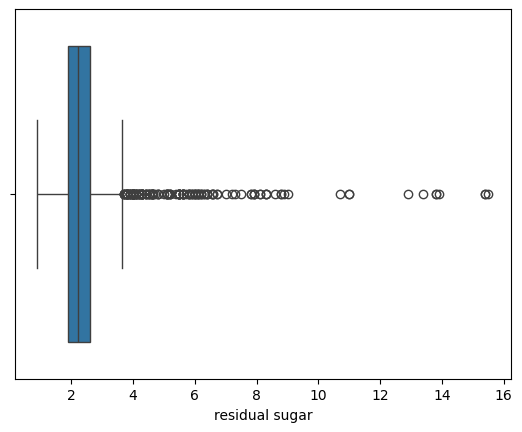

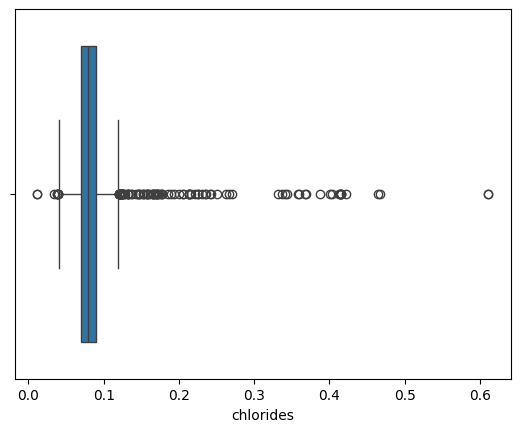

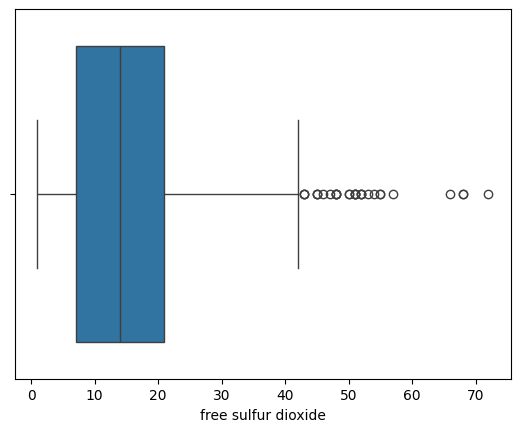

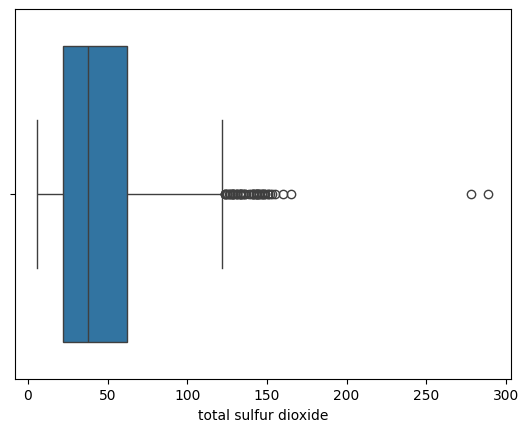

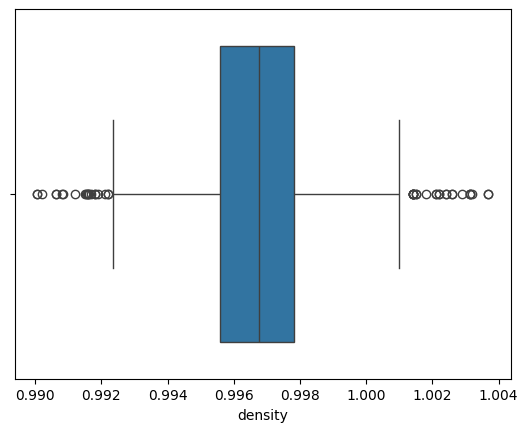

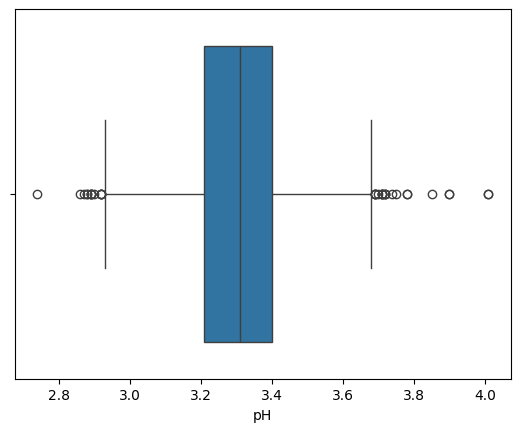

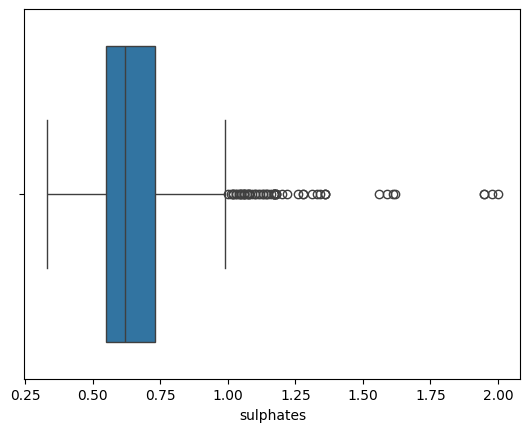

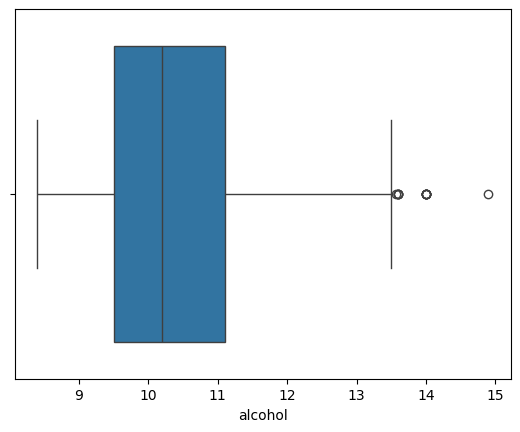

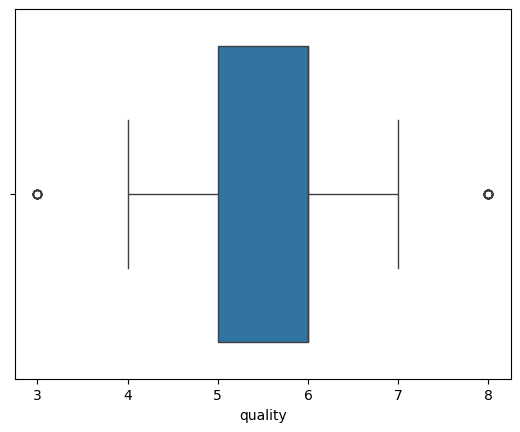

In [104]:
for i in x.select_dtypes(include="number").columns:
    sns.boxplot(data=x, x=i)
    plt.show()    

**insight:** ternyata semua fitur memiliki outlier

## **Feature Engineer**

### **Delete Duplicate Data**

In [105]:
x = x.drop_duplicates()
x.duplicated().sum()

0

### **Split Data**

In [106]:
X = x.drop('quality', axis=1).values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [107]:
y = x['quality'].values
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

### **Outlier Handling**

In [109]:
# Menghitung variansi untuk setiap kolom
variances = x.var()

# Menentukan ambang batas untuk variansi rendah
threshold = variances.quantile(0.10)

# Mengidentifikasi kolom dengan variansi rendah
low_variance_columns = variances[variances < threshold].index.tolist()

print(low_variance_columns)

['chlorides', 'density']


In [110]:
# Gabungan dari highly_skewed dan moderately_skewed
skewed_column = highly_skewed + moderately_skewed

# Memastikan hanya menghapus item yang ada dalam list untuk menghindari ValueError
skewed_column = [col for col in skewed_column if col not in low_variance_columns]

# Metode Capping untuk Distribusi Skew dengan Winsorizer
winsorizer_skewed = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=skewed_column, missing_values='ignore')

X_train_capp = winsorizer_skewed.fit_transform(X_train)
X_test_capp = winsorizer_skewed.transform(X_test)



KeyError: "None of [Index(['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide',\n       'sulphates', 'fixed acidity', 'volatile acidity', 'alcohol'],\n      dtype='object')] are in the [columns]"

In [ ]:
# def outlier_handling_plot_comparison(df_before, df_after, variable):
#     # Figure Size, and Super Title based on variable
#     fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
#     fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

#     # Plot Boxplot Before
#     sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
#     axes[1, 0].set_title('Boxplot Before')

#     # Plot Boxplot After
#     sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
#     axes[1, 1].set_title('Boxplot After')

#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     plt.show()

In [ ]:
# for col in skewed_column:
#     outlier_handling_plot_comparison(X_train, X_train_capped, col)

NameError: name 'X_train_capped' is not defined

### **Normalisasi**

In [ ]:
# X_train_capped = MinMaxScaler().fit_transform(X_train_capped)
# X_test_capped = MinMaxScaler().fit_transform(X_test_capped)

NameError: name 'X_train_capped' is not defined